In [1]:
import shap
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import eli5
shap.initjs()

In [2]:
# Read cervical cancer data
penguins = pd.read_csv("../../data/penguins.csv")
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins, columns=["species"], drop_first=True, dtype=int)

y = (penguins["sex"].values == "female").astype(int)
X = penguins.drop(["island", "sex", "year", "rowid"], axis=1)


mod = sk.ensemble.RandomForestClassifier(n_estimators = 5, random_state = 42)
mod.fit(X,y)

explainer = shap.Explainer(mod, X)
shap_values = explainer.shap_values(X)

## Explain Individual Predictions

In [3]:
x = mod.predict_proba(X)[:,1]

In [4]:
np.mean(x)

0.4798798798798799

In [5]:
explainer.expected_value

array([0.486, 0.514])

In [6]:
explainer.expected_value

array([0.486, 0.514])

In [7]:
shap_values.shape

(333, 6, 2)

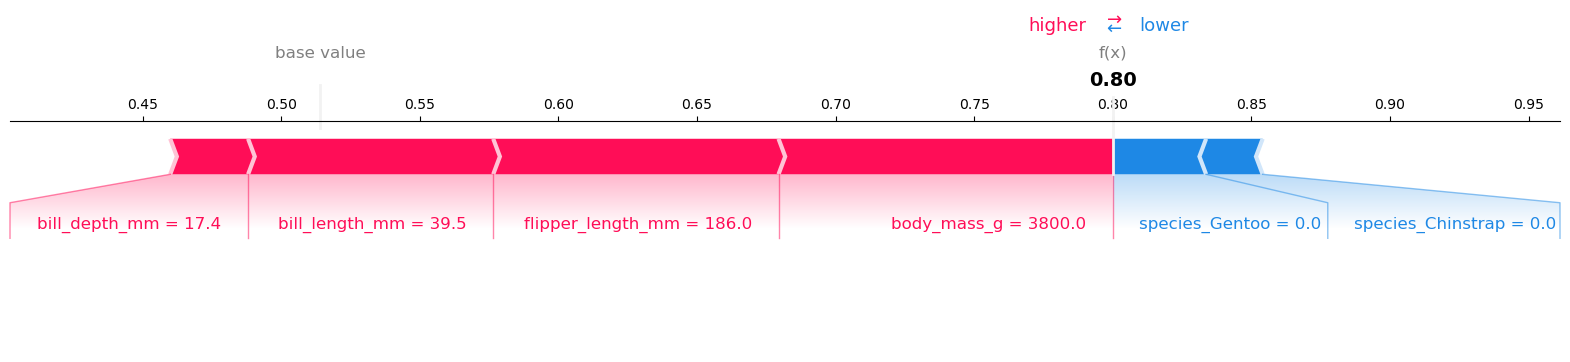

In [8]:
i = 1

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[i,:, 1], X.iloc[i,:], matplotlib = True)

In [9]:
shap_values[i][:,1]

array([ 0.08843334,  0.0281    ,  0.10293334,  0.1206    , -0.0204    ,
       -0.03366667])

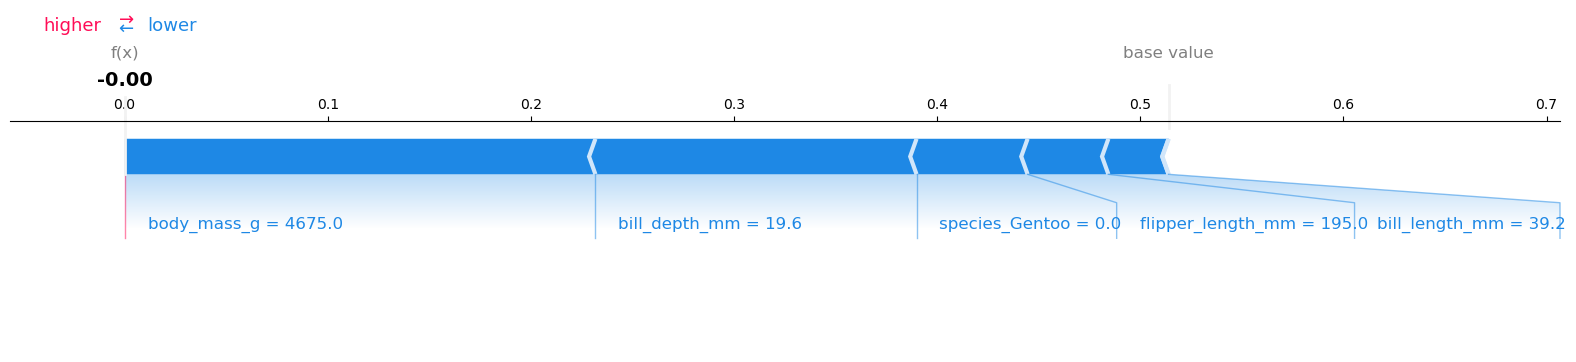

In [10]:
i = 6

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[i][:,1], X.iloc[i,:], matplotlib = True, text_rotation = 0)

## Dependence Plots

In [11]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.),  cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

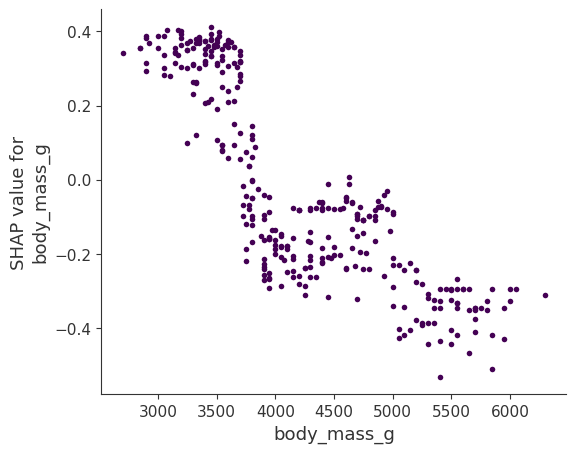

In [12]:
# Feature Effect
shap.dependence_plot("body_mass_g", shap_values[:, :, 1], X, interaction_index=None, color = cmap2.colors[0])

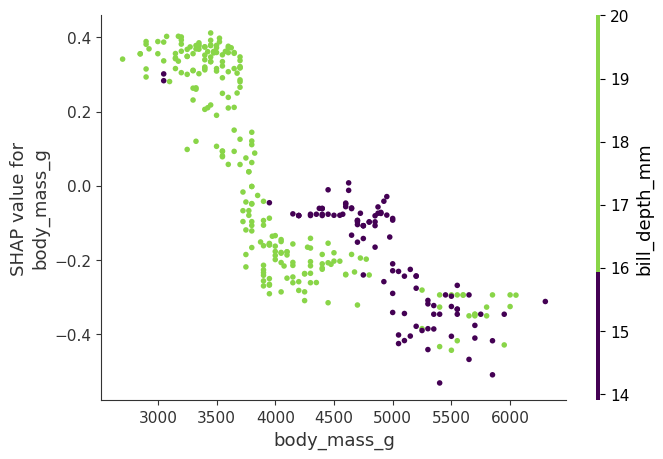

In [13]:
# Feature Effect with auto interaction detection
shap.dependence_plot("body_mass_g", shap_values[:, :, 1], X, cmap=cmap2)

## Summary Plots / Clustering

In [14]:
# Plot instance clustering
shap.force_plot(explainer.expected_value[1], shap_values[:,:,1], X)

# Feature Importance

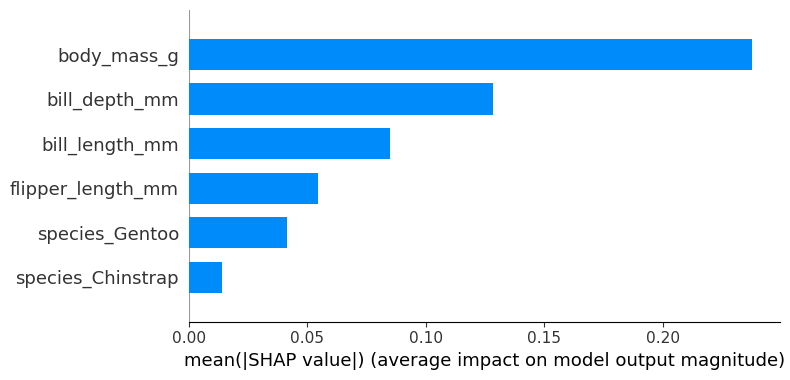

In [15]:
# Plot feature importance
shap.summary_plot(shap_values[:,:,1], X, plot_type = "bar")

Compare with permutation feature importance

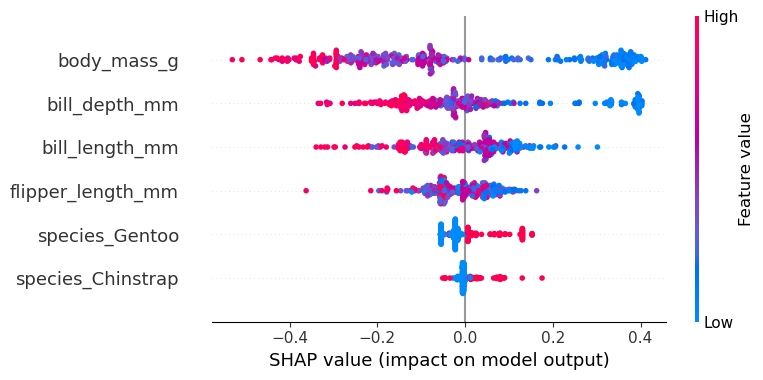

In [16]:
shap.summary_plot(shap_values[:,:,1], X)

# More interactions

In [17]:
shap_ia = explainer.shap_interaction_values(X, y)

FEATURE_DEPENDENCE::independent does not support interactions!
